<a href="https://colab.research.google.com/github/snanditachn/Nandita.S_cts/blob/main/26_8_ex_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Python for Data Science & Analysis**
Notes 3.1, Exploratory Data Analysis & Visualization

# *Objectives*

write a program which uses seaborn to:

show univariate plots (eg., distplot)

show multivariate plots (eg., scatterplot)

EXTRA: customize plots

# Part 3: Visualization

How do I use pandas to plot?

Pandas has a .plot which you configure using its arguments (eg., kind=hist), this however just uses seaborn.

In [3]:
from google.colab import files
 
 
uploaded = files.upload()

Saving titanic.csv to titanic.csv


In [5]:
import pandas as pd
import io
 
ti= pd.read_csv(io.BytesIO(uploaded['titanic.csv']))
ti.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


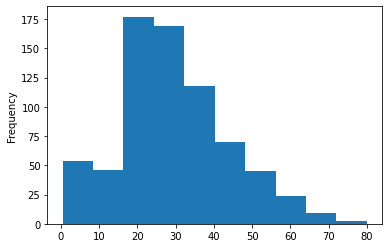

In [6]:
ti['age'].plot(kind='hist');

Often pandas doesn't choose the right plot, or the right dataseries... therefore it's often easier to go straight to using seaborn.

# *How do I use seaborn to visualize data?*

In [7]:
import seaborn as sns

Checks for emptiness and cleanse *data*

In [8]:
ti.isna().sum() #check for emptiness

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
#replace NaNs in numerical fields with the mean values
ti=ti.fillna(ti.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [10]:
# fill every column with its own most frequent value 
ti = ti.apply(lambda x:x.fillna(x.value_counts().index[0]))

There are two ways of using seaborn, you can either

supply x (, y, etc.) as individual arguments
OR: supply a dataframe and name the relevant columns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


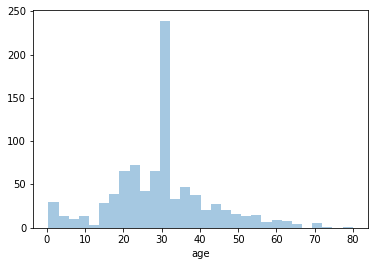

In [11]:
sns.distplot(ti['age'], kde=False);

What is the kde?
approximation of the distribution using a linear combination of normal distributions

further reading: https://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


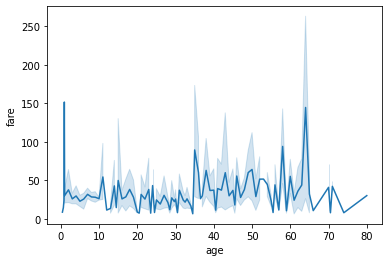

In [12]:
sns.lineplot(ti['age'], ti['fare'])

How do I use a dataframe with seaborn?
We set data to be the dataframe, and name the columns for x and y...

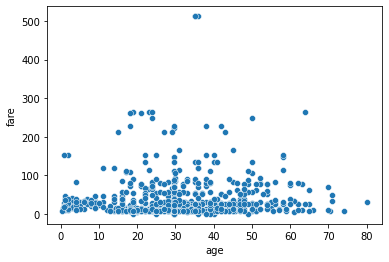

In [13]:
sns.scatterplot(data=ti, x='age', y='fare')

How do I create a distribution plot?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


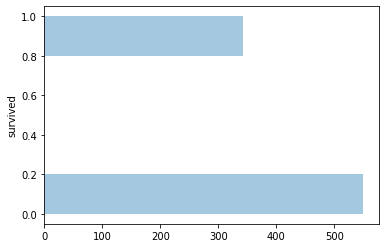

In [14]:
sns.distplot(ti['survived'], vertical=True, kde=False)

# How do I create a violin plot?

The width of a violin plot is the frequency (ie., how common) a value is within some column...

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


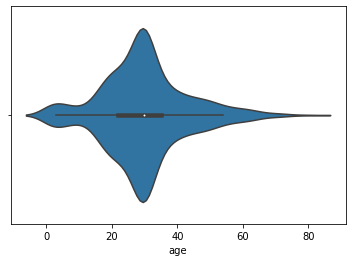

In [15]:
sns.violinplot(ti['age'])

# How do I create a box plot?

Box plots show quarties (25th, 50th, 75th) and outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


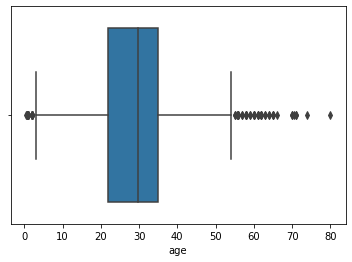

In [16]:
sns.boxplot(ti['age'])

# How do I create a violin plot for multiple columns?

A violin plot can show multiple distributions, each a subset of a single column, factored (or grouped) by another.

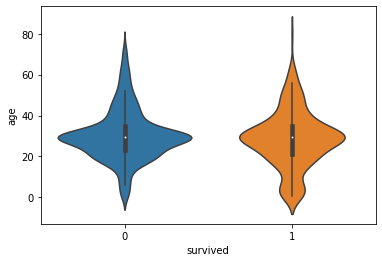

In [17]:
sns.violinplot(data=ti, x='survived', y='age')

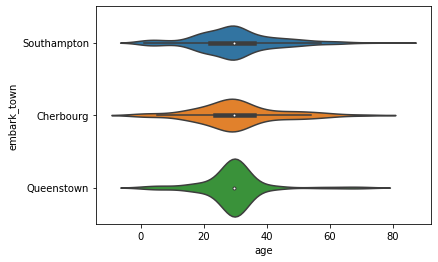

In [18]:
sns.violinplot(data=ti, x="age", y='embark_town')

# How do I create a bar plor for multiple columns?

Bar plots are useful for discrete data or for showing, here, the means:

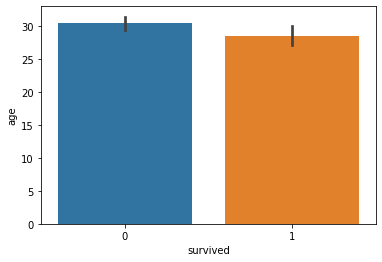

In [19]:
sns.barplot(data=ti, x='survived', y='age');

# How do I create a line plot?

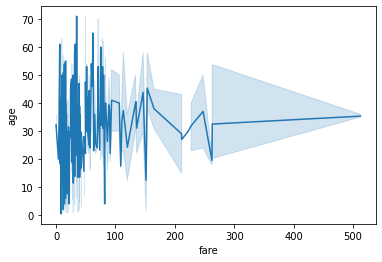

In [20]:
sns.lineplot(data=ti, x='fare', y='age');

NB: would creating a scatter plot be more appropriate?

# How do I create a scatter plot?

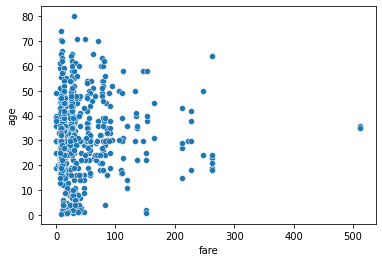

In [21]:
sns.scatterplot(data=ti, x='fare', y='age');

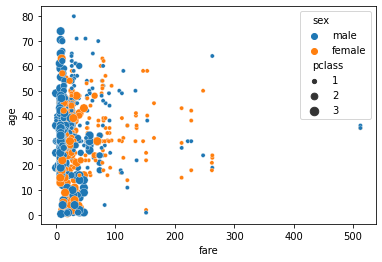

In [22]:
sns.scatterplot(data=ti, x='fare', y='age', 
                hue = 'sex', 
                size = 'pclass');

# EXTRA: Tips

Often for the sake of communication, using excel is both faster and leads to better visuals

use df.to_csv() to save the data behind a visual

use excel to heavily customize the layout (and then, eg., copy powerpoint)

# ** Exercise (30 min)**

### *Step 1 (5 min)*

review seaborn individual, try a few plots

 Distplot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


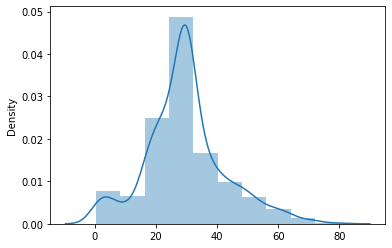

In [23]:
import seaborn as sns
sns.distplot(x = ti['age'], bins = 10)

 Joint Plot

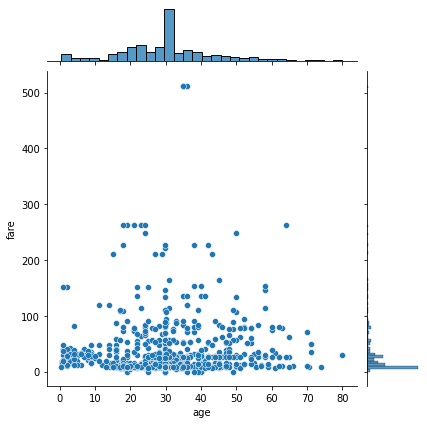

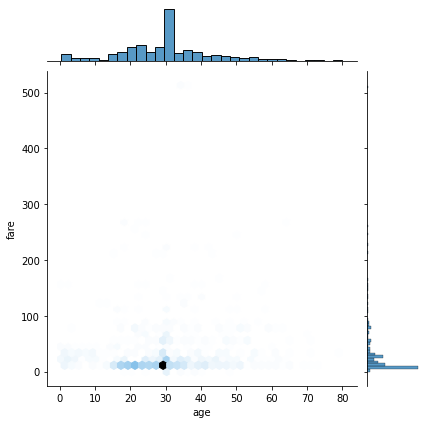

In [25]:
# For Plot 1
sns.jointplot(x = ti['age'], y = ti['fare'], kind = 'scatter')
# For Plot 2
sns.jointplot(x = ti['age'], y = ti['fare'], kind = 'hex')

 Rug Plot

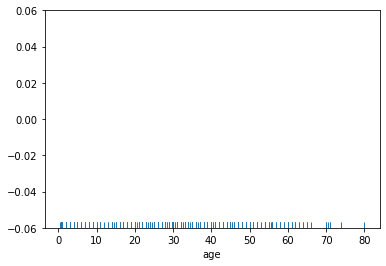

In [27]:
sns.rugplot(x = ti['age'])

Strip Plot

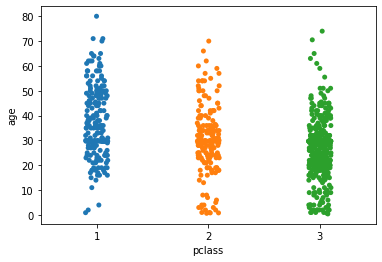

In [28]:
sns.stripplot(y = ti['age'], x = ti['pclass'])

Swarm Plot

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 43.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


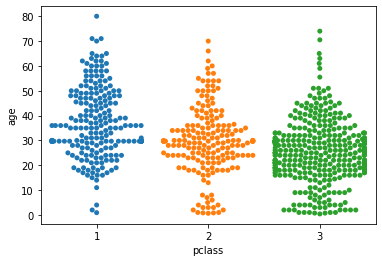

In [29]:
sns.swarmplot(y = ti['age'], x = ti['pclass'])

Heat Map

In [30]:
ti.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.253236,0.179775
sibsp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.253236,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.179775,-0.584471,-0.583398,-0.271832,0.404744,1.000000


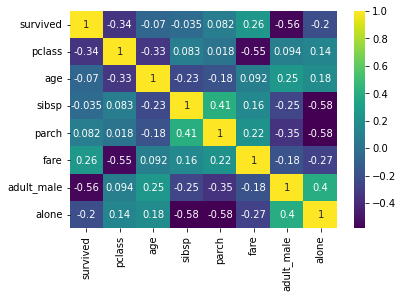

In [37]:
sns.heatmap(ti.corr(), annot = True, cmap = 'viridis')

regression plot

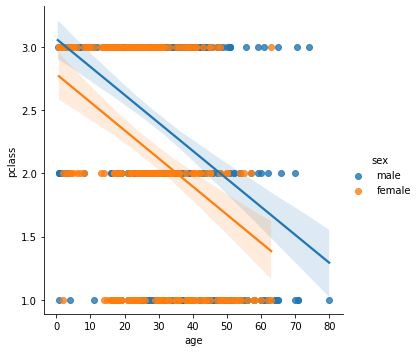

In [42]:
sns.lmplot(x = 'age', y = 'pclass', data = ti, hue = 'sex')

## *Step 2 (25 min)*
What affected your chances of survival on the titanic?

brainstorm & execute an analysis of the titanic dataset

Consider:

old vs. young

women vs. men

women & children vs. men

cheaper vs. expensive tickets

deck

class...

location...

Use seaborn plots (and pandas) to obtain helpful visuals which answer the investigatory question.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


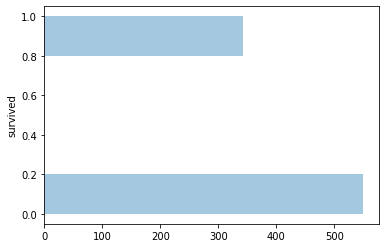

In [72]:
sns.distplot(ti['survived'], vertical=True, kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


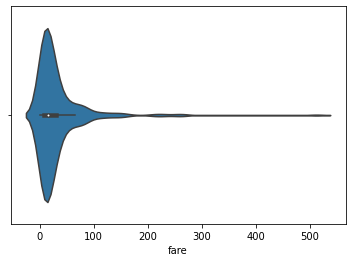

In [73]:
sns.violinplot(ti['fare'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


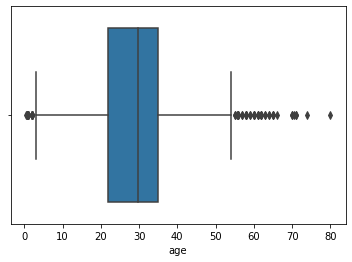

In [74]:
sns.boxplot(ti['age'])

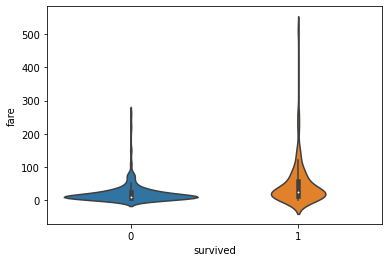

In [70]:
sns.violinplot(data=ti, x='survived', y='fare')

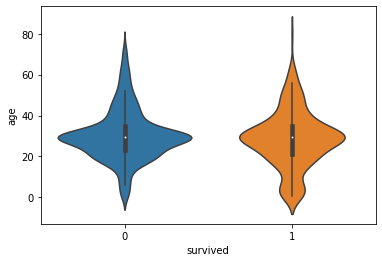

In [71]:
sns.violinplot(data=ti, x='survived', y='age')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


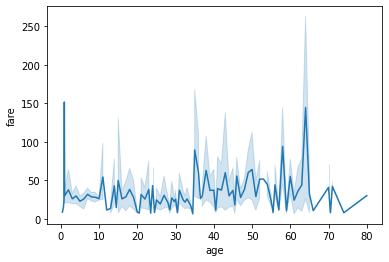

In [75]:
sns.lineplot(ti['age'], ti['fare'])

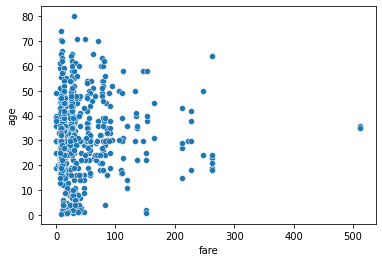

In [76]:
sns.scatterplot(data=ti, x='fare', y='age');

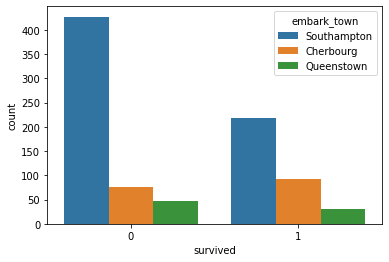

In [77]:
sns.countplot(data=ti,x='survived',hue='embark_town')

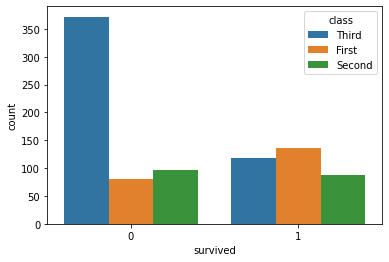

In [78]:
sns.countplot(data=ti,x='survived',hue='class')

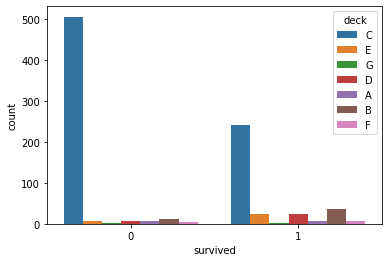

In [79]:
sns.countplot(data=ti,x='survived',hue='deck')

In [80]:
ti[['age','sex']].groupby(ti.age>18).sum() 

,age
age,
False,1489.670000
True,24972.243824
